In [4]:
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F

### Feed Forward Network with GELU Activation Function

In [3]:
class GELU(nn.Module):    
    def __init__(self, ):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0/torch.pi)) *
            (x + 0.44715 * torch.pow(x, 3))
            ))

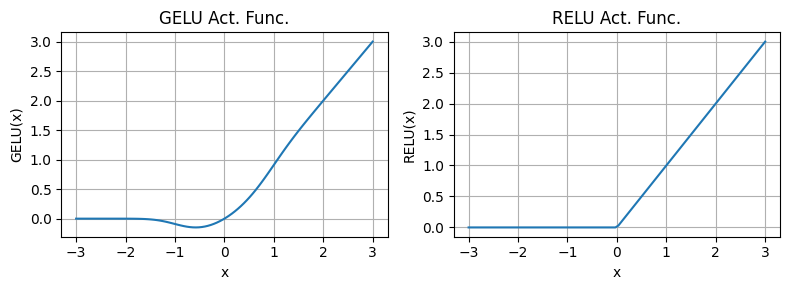

In [6]:
gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ['GELU', 'RELU']), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f'{label} Act. Func.')
    plt.xlabel('x')
    plt.ylabel(f'{label}(x)')
    plt.grid(True)
plt.tight_layout()
plt.show()

The smoothness of GELU, as shown in the above figure, can lead to better optimization properties
during training, as it allows for more nuanced adjustments to the model's parameters. 

In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder,
especially in networks that are very deep or have complex architectures. 

Moreover, unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output
for negative values. 

This characteristic means that during the training process, neurons that
receive negative input can still contribute to the learning process, albeit to a lesser extent
than positive inputs.

### Feed Forward Network Class

In [15]:
class FeedForward(nn.Module):
    
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg['emb_dim'], 4*cfg['emb_dim']), ## Expansion
            GELU(),                                      ## Activation
            nn.Linear(4*cfg['emb_dim'], cfg['emb_dim']), ## Contraction
        )
    
    def forward(self, x):
        return self.layers(x)

In [16]:
GPT_CONFIG_124M = {
    'vocab_size': 50257,    # vocabulary size
    'context_length': 1024, # Context Length
    'emb_dim': 768,         # Embedding dimension
    'n_heads': 12,          # Number of attention heads
    'n_layers': 12,          # Number of layers
    'drop_rate': 0.1,       # Dropout rate
    'qkv_bias': False       # Query-Key-Value bias
}

In [17]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) # A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


The FeedForward module we implemented in this section plays a crucial role in enhancing the model's ability to learn from and generalize the data. 


Although the input and output dimensions of this module are the same, it internally expands the embedding dimension
into a higher-dimensional space through the first linear layer.

This expansion is followed by a non-linear GELU activation, and then a contraction back to
the original dimension with the second linear transformation. 

Such a design allows for the
exploration of a richer representation space.